In [1]:
%load_ext autoreload 
%autoreload 2

from imports2 import *
import queue_system2 as qs
from queue_system2 import *

seed = random.seed(10)
seed_np = np.random.seed(10)

import torch

Dictionary representation:
0: [(4, 500.0), (5, 200.0), (6, 50.0), (9, 50.0), (7, 500.0), (13, 500.0), (15, 50.0), (12, 50.0), (10, 500.0), (11, 200.0), (8, 200.0), (14, 200.0)]
1: [(7, 500.0), (9, 50.0), (13, 500.0), (15, 50.0), (8, 200.0), (14, 200.0)]
2: [(10, 500.0), (12, 50.0), (13, 500.0), (15, 50.0), (11, 200.0), (14, 200.0)]
3: [(13, 500.0), (15, 50.0), (14, 200.0)]
4: [(0, 500.0)]
5: [(0, 200.0)]
6: [(0, 50.0)]
7: [(1, 500.0), (0, 500.0)]
8: [(1, 200.0), (0, 200.0)]
9: [(1, 50.0), (0, 50.0)]
10: [(2, 500.0), (0, 500.0)]
11: [(0, 200.0), (2, 200.0)]
12: [(2, 50.0), (0, 50.0)]
13: [(3, 500.0), (0, 500.0), (1, 500.0), (2, 500.0)]
14: [(0, 200.0), (1, 200.0), (2, 200.0), (3, 200.0)]
15: [(3, 50.0), (0, 50.0), (1, 50.0), (2, 50.0)]
dict_keys(['[0, 4]', '[0, 5]', '[0, 6]', '[1, 7]', '[1, 9]', '[2, 10]', '[2, 12]', '[3, 13]', '[3, 15]', '[9, 0]', '[7, 0]', '[13, 0]', '[13, 1]', '[13, 2]', '[15, 0]', '[15, 1]', '[15, 2]', '[12, 0]', '[10, 0]', '[11, 0]', '[2, 11]', '[1, 8]', '[8, 0]', 

## Import values

In [2]:
# in weights_actor_critic5_ ci sta quello del plot

In [3]:
with open('values/V_agg2.pkl', "rb") as fp: 
    V_agg = pickle.load(fp)
with open('values/V_star2.pkl', "rb") as fp: 
    V_star = pickle.load(fp)
with open('values/V_opt2.pkl', "rb") as fp: 
    V_opt = pickle.load(fp)
with open('values/V_exp2.pkl', "rb") as fp: 
    V_exp = pickle.load(fp)

## Import weights

In [4]:
weights_actor_critic = []
num_simulations = 10

for n in range(num_simulations):
    with open('weights/weights_actor_criticBIG_' + str(n) + '.pkl', "rb") as fp: #3
        weights_actor_critic.append(pickle.load(fp))
        
#     with open('weights/weights_actor_critic0_' + str(n) + '.pkl', "rb") as fp: #3
#         weights_actor_critic2.append(pickle.load(fp))
        
#     with open('weights/weights_actor_critic1_' + str(n) + '.pkl', "rb") as fp: #3
#         weights_actor_critic3.append(pickle.load(fp))
        
#     with open('weights/weights_actor_critic6_' + str(n) + '.pkl', "rb") as fp: #3
#         weights_actor_critic4.append(pickle.load(fp))

In [5]:
# for n in range(num_simulations):
#     del weights_actor_critic1[n]['-1'] 
#     del weights_actor_critic2[n]['-1'] 
#     del weights_actor_critic3[n]['-1'] 
#     del weights_actor_critic4[n]['-1']

model = StochasticMatching(graph, arrival_rates, queue_max)

In [6]:
model = StochasticMatching(graph, arrival_rates, queue_max)

estimated_values = []

for policy in tqdm(weights_actor_critic[0].values()):
    estimated_values.append(model.run_simulation(policy, experts, eta, discount, cLI))

100%|████████████████████████████████████████| 12/12 [2:34:29<00:00, 772.47s/it]


In [7]:
# %%time

# rewards_agg_b_expw1 = []
# # rewards_agg_b_expw3, rewards_agg_b_expw4 = [], []

# state_space_tensor = torch.FloatTensor(model.state_space).unsqueeze(0)

# for n in range(num_simulations):
    
#     rewards_agg_b_expw1.append([])
            
#     for policy in tqdm(weights_actor_critic1[n].values()):
        
       
#         P_agg, r_agg = compute_transitions_and_rewards_avg(policy)
#         V_agg = compute_value_bellman(P_agg, r_agg)
#         V_agg_pi0 = 0
#         for i in range(len(verteces)):
#             state = np.zeros(len(verteces))
#             state[i] += 1
#             ind = str(val_list.index(tuple(state)))
#             V_agg_pi0 += prob_arrival[i] * V_agg[int(ind)]
#         rewards_agg_b_expw1[-1].append(V_agg_pi0)

In [8]:
# rewards_agg_b_expw1.pop(2)

# Final Plot

## average over $\pi_0$

In [11]:
# V_star_pi0 = 0
# for i in range(len(verteces)):
#     state = np.zeros(len(verteces))
#     state[i] += 1
#     ind = str(val_list.index(tuple(state)))
#     V_star_pi0 += prob_arrival[i] * V_star[int(ind)]
#     #print(state_space_ind[ind])
    
# V_opt_pi0 = 0
# for i in range(len(verteces)):
#     state = np.zeros(len(verteces))
#     state[i] += 1
#     ind = str(val_list.index(tuple(state)))
#     V_opt_pi0 += prob_arrival[i] * V_opt[int(ind)]
#     #print(state_space_ind[ind])

In [ ]:
# V_exp_pi0 = {str(exp) : 0 for exp in experts}
# for v, exp in zip(V_exp, experts):
#     for i in range(len(verteces)):
#         state = np.zeros(len(verteces))
#         state[i] += 1
#         ind = str(val_list.index(tuple(state)))
#         V_exp_pi0[str(exp)] += prob_arrival[i] * v[int(ind)]
#         #print(state_space_ind[ind])

## Plot

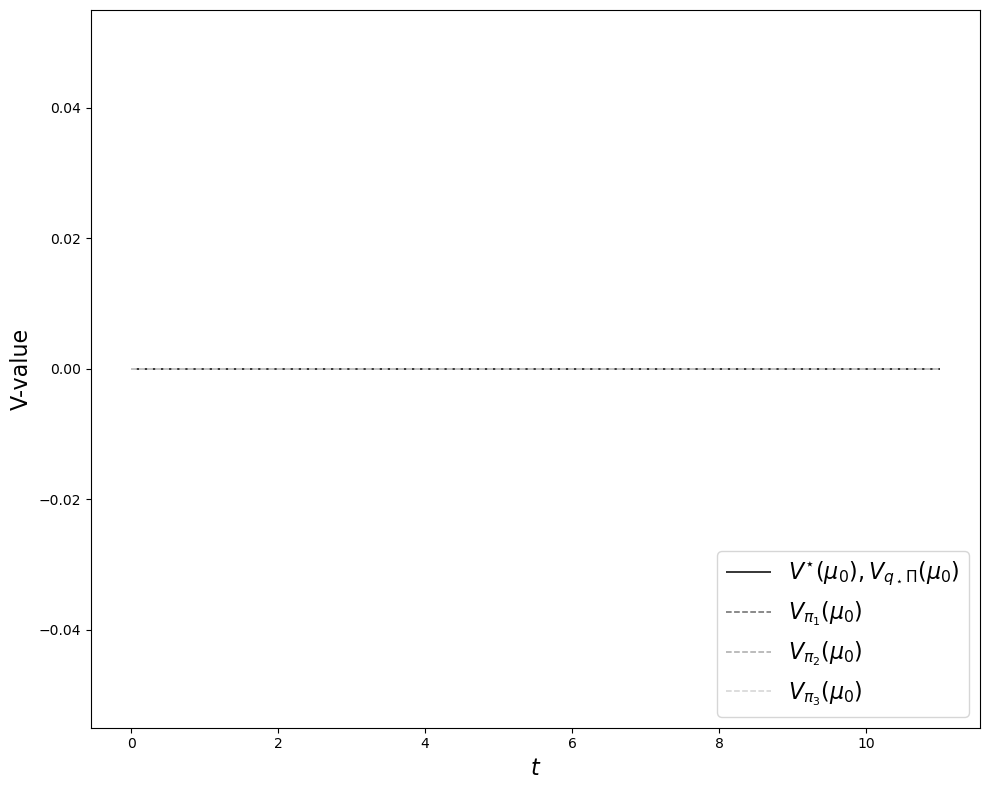

In [19]:
values_list = []

updates_x = np.array(range(12)) #* 100 #* 5000
updates_NN = np.array(range(22)) * 100 

figure(figsize=(10, 8))

# updates_x = np.arange(len(rewards_expw1_mean)) * 10 * 10


plt.hlines(V_star_pi0, 0, updates_x[-1], 'black',  linewidth=1.1, label = '$V^{\star}(\mu_0), V_{q_\star\Pi}(\mu_0)$')
# plt.hlines(V_opt_pi0, 0, updates_x[-1], 'black', ls ='dashdot',  linewidth=1.1, label = '$V_{q_\star\Pi}(\mu_0)$')

# plt.plot(estimated_values)


# plt.plot(updates_x, rewards_agg_b_expw1[0], label='policy NN with tabular A')
# plt.plot(updates_x, rewards_agg_b_expw2[0], label='tabular policy with A NN')
# plt.plot(updates_x, rewards_agg_b_expw3[1], label='mix 1')
# plt.plot(updates_x, rewards_agg_b_expw4[0], label='mix 2')


# ci1 = 2 * rewards_expw1_std
# plt.plot(updates_x, rewards_expw1_mean, 'C1', linewidth=.8, label='$V_{q_{NN}\Pi}$ (exponential pot. $\eta$ fixed)')
# plt.fill_between(updates_x, (rewards_expw1_mean-ci1), (rewards_expw1_mean+ci1), color='C1', alpha=.1)

# ci2 = 2 * rewards_expw2_std 
# plt.plot(updates_x, rewards_expw2_mean, 'C2', linewidth=.8, label='$V_{q_{NN}\Pi}$ (exponential pot. $\eta$ fixed)')
# plt.fill_between(updates_x, (rewards_expw2_mean-ci2), (rewards_expw2_mean+ci2), color='C2', alpha=.1)

# ci3 = 2 * rewards_expw3_std
# plt.plot(updates_x, rewards_expw3_mean, 'C3', linewidth=.8, label='$V_{q_{NN}\Pi}$ (exponential pot. $\eta_t$)')
# plt.fill_between(updates_x, (rewards_expw3_mean-ci3), (rewards_expw3_mean+ci3), color='C3', alpha=.1)

# ci4 = 2 * rewards_expw4_std
# plt.plot(updates_x, rewards_expw4_mean, 'C4', linewidth=.8, label='$V_{q_{NN}\Pi}$ (polynomial pot.)')
# plt.fill_between(updates_x, (rewards_expw4_mean-ci4), (rewards_expw4_mean+ci4), color='C4', alpha=.1)

        
c = ['dimgrey', 'darkgrey', 'lightgrey', 'grey', 'darkgrey']
count = 0
    
V_exp_sorted = sorted(V_exp_pi0.items(), key=lambda x:x[1], reverse= True)

for item in V_exp_sorted:
    plt.hlines(item[1], 0, updates_x[-1], c[count], linestyle='dashed', linewidth=1.1, label = '$V_{\pi_' + str(exp_ind[item[0]] +1 ) + '}(\mu_0)$')
    count += 1


plt.xlabel('$t$', fontsize=16)
plt.ylabel('V-value', fontsize=16)
# plt.xlim((0, 1000))
# plt.ylim((1.08, 1.09))
#plt.title('Values comparison')
plt.legend(loc='lower right', fontsize=16)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('figures/policies_learning_comparison__.pdf')